!pip install BeautifulSoup4, lxml, pandas, requests, IPython, googlemaps

In [1]:
import json, config
from urllib.request import urlopen
from bs4 import BeautifulSoup
import googlemaps

In [2]:
gmaps = googlemaps.Client(key=config.google_api_key)

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums"

In [4]:
page = urlopen(url)

In [5]:
soup = BeautifulSoup(page, "lxml")

In [6]:
first_table = soup.find('table', class_='wikitable sortable plainrowheaders')

In [7]:
A=[] #IMG
B=[] #Arena
C=[] #Capacity
D=[] #City
E=[] #surface
F=[] #Roof Type
G=[] #Team(s)
H=[] #Opened
I=[] #State

In [8]:
for row in first_table.findAll('tr'):
    cells = row.findAll(['td', 'th'])
    if cells[0].find(scope_=lambda x: x != 'col'):

        A.append(cells[0].find('img')['src'].replace("120px", "250px"))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True).rstrip('\n'))
        ##this splits the city and state then puts them in their own arrays.
        location = cells[3].find(text=True).split(',')
        
        D.append(location[0])
        I.append(location[1].lstrip())
        E.append(cells[4].find(text=True).rstrip('\n'))
        F.append(cells[5].find(text=True).rstrip('\n'))
        teams = cells[6].findAll('a')
        if len(teams) > 1 :
            tempArray= []
            for i in teams:
                tempArray.append(str(i.find_all(text=True)).rstrip('[')[2:len(i)-3])
            G.append(" and ".join(tempArray))
        else:
            G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True).rstrip('\n'))


In [9]:
import pandas as pd
df=pd.DataFrame(G,columns=['Team'])
df['Arena']= B
df['City']= D
df['State'] = I
df['Capacity']= C
df['opened']= H
df['surface']= E
df['Roof Type']= F
df['image']= A
df

,Team,Arena,City,State,Capacity,opened,surface,Roof Type,image
0,Pittsburgh Steelers,Acrisure Stadium,Pittsburgh,Pennsylvania,"68,400",2001,Kentucky bluegrass,Open,//upload.wikimedia.org/wikipedia/commons/thumb...
1,Las Vegas Raiders,Allegiant Stadium,Paradise,Nevada,"65,000",2020,Bermuda grass,Fixed,//upload.wikimedia.org/wikipedia/commons/thumb...
2,Kansas City Chiefs,GEHA Field at Arrowhead Stadium,Kansas City,Missouri,"76,416",1972,Bermuda grass,Open,//upload.wikimedia.org/wikipedia/commons/thumb...
3,Dallas Cowboys,AT&T Stadium,Arlington,Texas,"80,000",2009,Hellas Matrix,Retractable,//upload.wikimedia.org/wikipedia/commons/thumb...
4,Carolina Panthers,Bank of America Stadium,Charlotte,North Carolina,"75,523",1996,FieldTurf,Open,//upload.wikimedia.org/wikipedia/commons/thumb...
5,New Orleans Saints,Caesars Superdome,New Orleans,Louisiana,"73,208",1975,FieldTurf,Fixed,//upload.wikimedia.org/wikipedia/commons/thumb...
6,Denver Broncos,Empower Field at Mile High,Denver,Colorado,"76,125",2001,Kentucky bluegrass,Open,//upload.wikimedia.org/wikipedia/commons/thumb...
7,Washington Commanders,FedExField,Landover,Maryland,"67,717",1997,Bermuda grass,Open,//upload.wikimedia.org/wikipedia/commons/thumb...
8,Cleveland Browns,FirstEnergy Stadium,Cleveland,Ohio,"67,895",1999,Kentucky bluegrass,Open,//upload.wikimedia.org/wikipedia/commons/thumb...
9,Detroit Lions,Ford Field,Detroit,Michigan,"65,000",2002,FieldTurf,Fixed,//upload.wikimedia.org/wikipedia/commons/thumb...


In [10]:
location = [];
for i in range(len(B)):
    searchTerm = B[i] + ", " + D[i] + "," + I[i]
    geocode_result = gmaps.geocode(searchTerm)
    data = geocode_result[0]['geometry']['location']
    tempArray = []
    tempArray.append(float(data['lng']))
    tempArray.append(float(data['lat']))
    location.append(tempArray[::-1])


In [11]:
final_data = []
for i in range(len(A)):
    temp={}
    temp['Image'] = "HTTPS:" + A[i]
    temp['Team'] = G[i]
    temp['Arena'] = B[i]
    temp['Location'] = D[i] + ", " + I[i]
    temp['Surface'] = E[i]
    temp['Roof Type'] = F[i]
    temp['Capacity'] = C[i]
    temp['opened'] = H[i]
    temp['Coordinates'] = location[i]
    final_data.append(temp)

In [12]:
print(len(final_data))

30


In [13]:
with open('NFL.json', 'w') as outfile:
    json.dump(final_data, outfile)

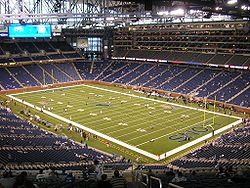

In [15]:
import requests, IPython.display as Disp
url = final_data[9]['Image']
Disp.Image(requests.get(url).content)